Libraries used are:
1. **Catlab**: Provides tools for category theory, allowing manipulation of mathematical structures and creation of wiring diagrams.
2. **AlgebraicPetri**: Facilitates modeling and simulating Petri nets, useful for representing distributed or concurrent systems.
3. **AlgebraicDynamics.UWDDynam**: Supports modeling open dynamical systems with external interactions and evolving states.
4. **DifferentialEquations**: Solves differential equations, enabling simulation of time-dependent dynamical systems.
5. **LabelledArrays**: Creates arrays with labeled elements, simplifying tracking of variables in systems with named components.
6. **Plots**: Offers comprehensive plotting tools for visualizing mathematical models and simulation results.


In [2]:
using Catlab, Catlab.CategoricalAlgebra, Catlab.Programs, Catlab.WiringDiagrams, Catlab.Graphics 
using AlgebraicPetri 
using AlgebraicDynamics.UWDDynam 

using DifferentialEquations 

using LabelledArrays 
using Plots

Functions which takes in *"place names"* and *"transition names"* and creates an **open petri-net** using Catlab's *"OpenLabelledPetriNet"* method.

- `HE_addition` creates petri-nets which represent **He-4 addition reactions**.
- `decay_reaction` creates petri-nets which represent **decay chains**.

In [3]:
# Function to generate binary fusion reactions (He_ + Element => Product)
function HE_addition(elements::Tuple, transition_name::Symbol)
    return Open(LabelledPetriNet(
        elements,   # Places: Input and Output elements
        transition_name => ((elements[1], elements[2]) => (elements[3]))  # Transition rule
    ))
end

# Function to generate decay reactions (Element => Intermediate => Product)
function decay_reaction(elements::Tuple, transition_names::Tuple)
    return Open(LabelledPetriNet(
        elements,   # Places: Input and Output elements
        transition_names[1] => ((elements[1]) => (elements[2])),  # First Decay
        transition_names[2] => ((elements[2]) => (elements[3]))   # Second Decay
    ))
end

decay_reaction (generic function with 1 method)

Creating open petri-nets for each reaction in the **"alpha process"**.

In [4]:
# Generate all the fusion reactions
Rxn_1 = HE_addition((:He, :C, :O), :He_C)
Rxn_2 = HE_addition((:He, :O, :Ne), :He_O)
Rxn_3 = HE_addition((:He, :Ne, :Mg), :He_Ne)
Rxn_4 = HE_addition((:He, :Mg, :Si), :He_Mg)
Rxn_5 = HE_addition((:He, :Si, :S), :He_Si)
Rxn_6 = HE_addition((:He, :S, :Ar), :He_S)
Rxn_7 = HE_addition((:He, :Ar, :Ca), :He_Ar)
Rxn_8 = HE_addition((:He, :Ca, :Ti), :He_Ca)
Rxn_9 = HE_addition((:He, :Ti, :Cr), :He_Ti)
Rxn_10 = HE_addition((:He, :Cr, :Fe), :He_Cr)
Rxn_11 = HE_addition((:He, :Fe, :Ni), :He_Fe)

# Generate all the decay reactions
Rxn_12 = decay_reaction((:Ti, :Sc, :Ca_stable), (:Ti_Sc, :Sc_Ca))
Rxn_13 = decay_reaction((:Cr, :V, :Ti_stable), (:Cr_V, :V_Ti))
Rxn_14 = decay_reaction((:Fe, :Mn, :Cr_stable), (:Fe_Mn, :Mn_Cr))
Rxn_15 = decay_reaction((:Ni, :Co, :Fe_stable), (:Ni_Co, :Co_Fe))


StructuredMulticospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{AnonACSet{TypeLevelBasicSchema{Symbol, Tuple{:S}, Tuple{}, Tuple{:Name}, Tuple{(:sname, :S, :Name)}, Tuple{}}, Tuple{Symbol}, @NamedTuple{S::IntParts, Name::IntParts}, @NamedTuple{sname::ACSets.ColumnImplementations.DenseColumn{Union{AttrVar, Symbol}, Vector{Union{AttrVar, Symbol}}}}, IntParts}, LabelledPetriNet}, SMulticospan{3, LabelledPetriNet, StructTightACSetTransformation{TypeLevelBasicSchema{Symbol, Tuple{:T, :S, :I, :O}, Tuple{(:it, :I, :T), (:is, :I, :S), (:ot, :O, :T), (:os, :O, :S)}, Tuple{:Name}, Tuple{(:tname, :T, :Name), (:sname, :S, :Name)}, Tuple{}}, @NamedTuple{T::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, S::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, I::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Cat

Using `@relation` to create a composition pattern, in which the relation between each individual reaction (open petri-net) is described.

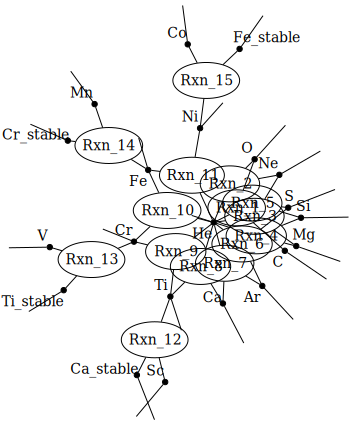

In [5]:
alpha_chain_composition_pattern = @relation (He, C, O, Ne, Mg, Si, S, Ar, Ca, Ti, Cr, Fe, Ni, Sc, Ca_stable, V, Ti_stable, Mn, Cr_stable, Co, Fe_stable) where (He, C, O, Ne, Mg, Si, S, Ar, Ca, Ti, Cr, Fe, Ni, Sc, Ca_stable, V, Ti_stable, Mn, Cr_stable, Co, Fe_stable) begin
    # Rxn_1 through Rxn_15 mapped to the respective elements in the alpha chain
    Rxn_1(He, C, O)
    Rxn_2(He, O, Ne)
    Rxn_3(He, Ne, Mg)
    Rxn_4(He, Mg, Si)
    Rxn_5(He, Si, S)
    Rxn_6(He, S, Ar)
    Rxn_7(He, Ar, Ca)
    Rxn_8(He, Ca, Ti)
    Rxn_9(He, Ti, Cr)
    Rxn_10(He, Cr, Fe)
    Rxn_11(He, Fe, Ni)
    Rxn_12(Ti, Sc, Ca_stable)
    Rxn_13(Cr, V, Ti_stable)
    Rxn_14(Fe, Mn, Cr_stable)
    Rxn_15(Ni, Co, Fe_stable)
end

# Visualizing the forest composition pattern with to_graphviz
to_graphviz(alpha_chain_composition_pattern, box_labels = :name, junction_labels = :variable)


As we can see the figure is too clumsy and difficult to understand. With the below function, provided by Hirithik, we can modify the style which makes the pattern easier to understand.

In [8]:
display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, graph_attrs=Dict(
        "layout" => "neato",
        "bgcolor" => "white",
        "overlap" => "false",
        "splines" => "true"
    ),
    node_attrs=Dict(
        "shape" => "circle",
        "style" => "filled",
        "fillcolor" => "lightblue",
        "fontname" => "Calibri",
        "fontsize" => "10"
    ),
    edge_attrs=Dict(
        "color" => "red",
        "penwidth" => "1"
    ))

display_uwd (generic function with 1 method)

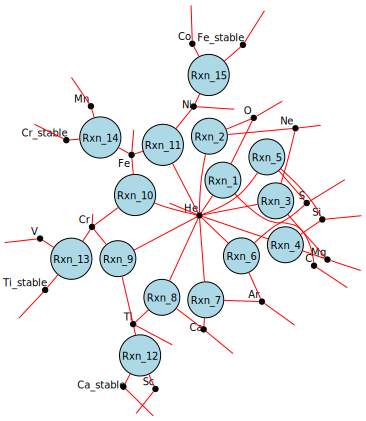

In [9]:
display_uwd(alpha_chain_composition_pattern)

`oapply` is used to apply the composition pattern on the open petri-nets.

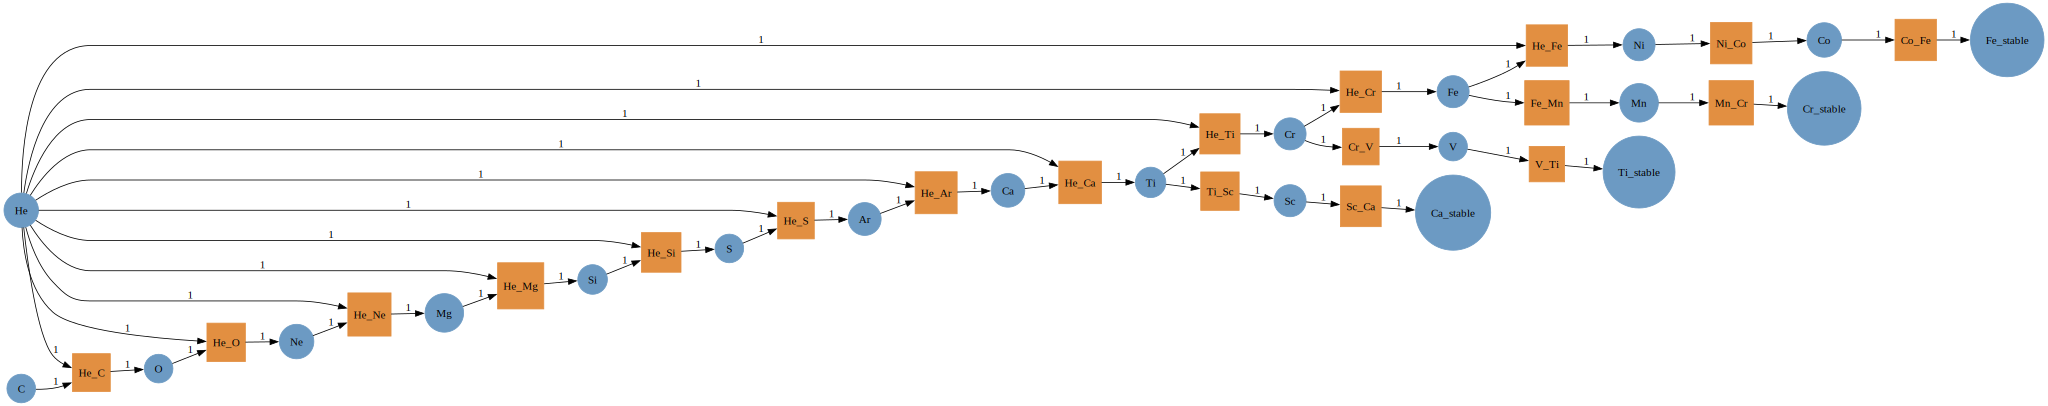

In [6]:
rxn_composite = oapply(alpha_chain_composition_pattern, 
    Dict(   
        :Rxn_1 => Rxn_1, 
        :Rxn_2 => Rxn_2, 
        :Rxn_3 => Rxn_3, 
        :Rxn_4 => Rxn_4, 
        :Rxn_5 => Rxn_5, 
        :Rxn_6 => Rxn_6, 
        :Rxn_7 => Rxn_7, 
        :Rxn_8 => Rxn_8, 
        :Rxn_9 => Rxn_9, 
        :Rxn_10 => Rxn_10, 
        :Rxn_11 => Rxn_11, 
        :Rxn_12 => Rxn_12, 
        :Rxn_13 => Rxn_13, 
        :Rxn_14 => Rxn_14, 
        :Rxn_15 => Rxn_15
    )
)

to_graphviz(rxn_composite, program="dot")

Now using appropriate rate constants and initial conditions, we can solve this dynamical system by taking the ODEs using `ODEProblem()` and using `solve()` to find the solution to the differential equations. The solution is then plotted using `plot()`.

| Transition       | Half-Life         | Rate Constant (/day) |
|------------------|-------------------|----------------------|
| Cr-48 → V-48     | 21.6 hours        | 0.77                 |
| Ti-44 → Sc-44    | 60 years          | 3.208e-5             |
| Sc-44 → Ca-44    | 3.97 hours        | 4.189                |
| V-48 → Ti-48     | 15.9735 days      | 0.0626               |
| Fe-52 → Mn-52    | 8.275 hours       | 2.01                 |
| Mn-52 → Cr-52    | 5.59 days         | 0.124                |
| Ni-56 → Co-56    | 6.1 days          | 0.1136               |
| Co-56 → Fe-56    | 77.1 days         | 0.009                |


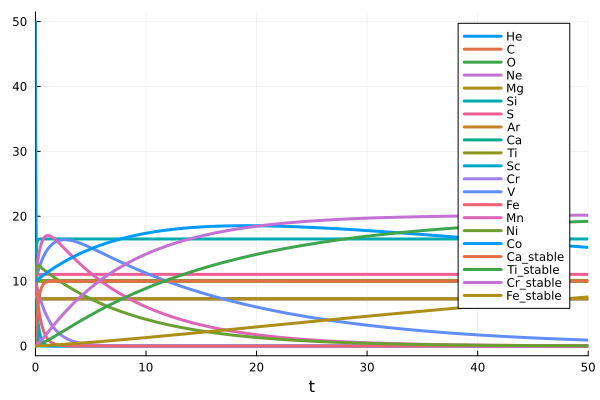

In [7]:
# Assigning parameter values and initial conditions and finding the solution for this Dynamical System
p = LVector(
    He_C = 0.1,
    He_O = 0.2,
    He_Ne = 0.3,
    He_Mg = 0.4,
    He_Si = 0.1,
    He_S = 0.1,
    He_Ar = 0.1,
    He_Ca = 0.1,
    He_Ti = 0.1,
    He_Cr = 0.1,
    He_Fe = 0.1,
    Ti_Sc = 3.208e-5,       
    Sc_Ca = 4.189,       
    Cr_V = 0.77,        
    V_Ti = 0.0626,
    Fe_Mn = 2.01,
    Mn_Cr = 0.124,
    Ni_Co = 0.1136,
    Co_Fe = 0.009
)
u0 = LVector(
    He = 50,
    C = 10,
    O = 10,
    Ne = 10,
    Mg = 10,
    Si = 10,
    S = 10,
    Ar = 10,
    Ca = 10,
    Ti = 10,
    Sc = 10,
    Cr = 10,
    V = 10,
    Fe = 10,
    Mn = 10,
    Ni = 10,
    Co = 10,
    Ca_stable = 0,
    Ti_stable = 0,
    Cr_stable = 0,
    Fe_stable = 0
)
soln = solve(ODEProblem(vectorfield(apex(rxn_composite)), u0, (0.0, 50.0), p))
plot(soln, linewidth=3)